In [1]:
!pip install pymongo

In [2]:
!pip install splinter

In [3]:
!pip install webdriver_manager

In [4]:
# import dependencies
from splinter import Browser
import pandas as pd
from bs4 import BeautifulSoup
from webdriver_manager.chrome import ChromeDriverManager
import requests
import os
import pymongo


In [5]:
# Set up splinter
executable_path = {'executable_path': ChromeDriverManager().install()}
browser = Browser('chrome', **executable_path, headless=False)




====== WebDriver manager ======
Current google-chrome version is 94.0.4606
Get LATEST driver version for 94.0.4606
Driver [C:\Users\Owner\.wdm\drivers\chromedriver\win32\94.0.4606.61\chromedriver.exe] found in cache


In [6]:
# URL of page to be scrapped
url = 'https://mars.nasa.gov/news/9051/nasas-mars-fleet-lies-low-with-sun-between-earth-and-red-planet/'
browser.visit(url)
# Retrieve page with the requests module
response = requests.get(url, verify=True)
print(response.text)



<!DOCTYPE html>
<html lang='en' xml:lang='en' xmlns='http://www.w3.org/1999/xhtml'>
<head>
<meta content='text/html; charset=utf-8' http-equiv='Content-Type'>
<!-- Always force latest IE rendering engine or request Chrome Frame -->
<meta content='IE=edge,chrome=1' http-equiv='X-UA-Compatible'>
<!-- Responsiveness -->
<meta content='width=device-width, initial-scale=1.0' name='viewport'>
<!-- Favicon -->
<link href='/apple-touch-icon.png' rel='apple-touch-icon' sizes='180x180'>
<link href='/favicon-32x32.png' rel='icon' sizes='32x32' type='image/png'>
<link href='/favicon-16x16.png' rel='icon' sizes='16x16' type='image/png'>
<link href='/manifest.json' rel='manifest'>
<link color='#e48b55' href='/safari-pinned-tab.svg' rel='mask-icon'>
<meta content='#000000' name='theme-color'>

<meta name="csrf-param" content="authenticity_token" />
<meta name="csrf-token" content="++fhGGbtPHkaePPN1sLwO1RC5hUdQVId/J44/SLuo1Whn5AosP7b96mY6zUar9siaZHVs/rH6jOXKwXS6+PL1w==" />
<title>NASA's Mars Fleet Lie

In [7]:
title = ""
content = ""

In [8]:
#Create BeautifulSoup object; parse with 'html.parser'
soup = BeautifulSoup(response.text, 'html.parser')


for paragraph in soup.find_all("p"):
    content = content + paragraph.get_text() + "\n"
   

In [9]:
title = soup.title.get_text()

In [10]:
title

"NASA's Mars Fleet Lies Low with Sun Between Earth and Red Planet – NASA’s Mars Exploration Program "

In [11]:
url = 'https://data-class-jpl-space.s3.amazonaws.com/JPL_Space/index.html'
browser.visit(url)

# Retrieve page with the requests module
response = requests.get(url, verify=True)
print(response.text)


<!DOCTYPE html>
<html>
   <head>
      <meta charset="utf-8">
      <meta name="viewport" content="width=device-width, initial-scale=1">
      <link rel="stylesheet" href="https://maxcdn.bootstrapcdn.com/bootstrap/4.0.0/css/bootstrap.min.css">
      <!-- <link rel="stylesheet" type="text/css" href="css/font.css"> -->
      <link rel="stylesheet" type="text/css" href="css/app.css">
      <link rel="stylesheet" type="text/css" href="https://stackpath.bootstrapcdn.com/font-awesome/4.7.0/css/font-awesome.min.css">
      <title>Space Image</title>
   </head>
   <body>
      <div class="header">
         <nav class="navbar navbar-expand-lg ">
            <a class="navbar-brand" href="#"><img id="logo" src="image/nasa.png"><span class="logo">Jet Propulsion Laboratory</span>
            <span class="logo1">California Institute of Technology</span></a>
            <button class="navbar-toggler" type="button" data-toggle="collapse" data-target="#navbarNav" aria-controls="navbarNav" aria-expanded

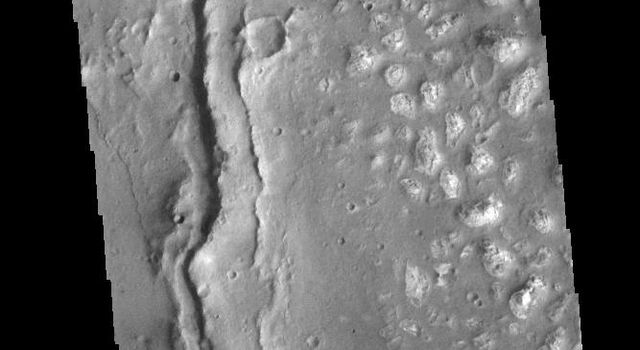

In [13]:
from PIL import Image
from io import BytesIO


# img = Image.open(BytesIO(response.content))

soup = BeautifulSoup(response.text, 'html.parser')
for image in browser.find_by_tag('img'):
    
    u = image['src']
    
    if(u.startswith("http") and "featured" in u):
        r = requests.get(u)
        featured_image_url = u
        pil_img = Image.open(BytesIO(r.content))
        display(pil_img)
        
    


In [16]:
from urllib import request
import ssl

url = 'https://space-facts.com/mars/'
context = ssl._create_unverified_context()
response = request.urlopen(url, context=context)
html = response.read()
df_list = pd.read_html(html)
df_list

[                      0                              1
 0  Equatorial Diameter:                       6,792 km
 1       Polar Diameter:                       6,752 km
 2                 Mass:  6.39 × 10^23 kg (0.11 Earths)
 3                Moons:            2 (Phobos & Deimos)
 4       Orbit Distance:       227,943,824 km (1.38 AU)
 5         Orbit Period:           687 days (1.9 years)
 6  Surface Temperature:                   -87 to -5 °C
 7         First Record:              2nd millennium BC
 8          Recorded By:           Egyptian astronomers,
   Mars - Earth Comparison             Mars            Earth
 0               Diameter:         6,779 km        12,742 km
 1                   Mass:  6.39 × 10^23 kg  5.97 × 10^24 kg
 2                  Moons:                2                1
 3      Distance from Sun:   227,943,824 km   149,598,262 km
 4         Length of Year:   687 Earth days      365.24 days
 5            Temperature:     -87 to -5 °C      -88 to 58°C,
           

In [17]:
html_string = ""
table1 = df_list[0]
table1.to_html('table.html',header=False, index=False)

# for df in table1:
#     df.to_html('table.html')

In [18]:
url = 'https://astrogeology.usgs.gov/search/results?q=hemisphere+enhanced&k1=target&v1=Mars'
browser.visit(url)
# Retrieve page with the requests module
response = requests.get(url, verify=True)

toVisitList = []

for link in browser.find_by_tag('a'):
    if("enhanced" in link['href'] and  link['href'] not in toVisitList ):
        toVisitList.append(link['href'])
toVisitList

# https://astropedia.astrogeology.usgs.gov/download/Mars/Viking/cerberus_enhanced.tif/full.jpg

['https://astrogeology.usgs.gov/search/map/Mars/Viking/cerberus_enhanced',
 'https://astrogeology.usgs.gov/search/map/Mars/Viking/schiaparelli_enhanced',
 'https://astrogeology.usgs.gov/search/map/Mars/Viking/syrtis_major_enhanced',
 'https://astrogeology.usgs.gov/search/map/Mars/Viking/valles_marineris_enhanced']

In [19]:
fullImages = []
fullTitles = []
for link in toVisitList:
    browser.visit(link)
    for l in  browser.find_by_tag('a'):
        if("full.jpg" in l['href']):
            fullImages.append(l['href'])
            imageStr = l['href']
            arr = imageStr.split("/")
            temp = arr[len(arr)-2].replace('_enhanced.tif', '')
            result = temp.replace("_", " ").title()
            fullTitles.append(result)
print(fullImages)
print(fullTitles)

['https://astropedia.astrogeology.usgs.gov/download/Mars/Viking/cerberus_enhanced.tif/full.jpg', 'https://astropedia.astrogeology.usgs.gov/download/Mars/Viking/schiaparelli_enhanced.tif/full.jpg', 'https://astropedia.astrogeology.usgs.gov/download/Mars/Viking/syrtis_major_enhanced.tif/full.jpg', 'https://astropedia.astrogeology.usgs.gov/download/Mars/Viking/valles_marineris_enhanced.tif/full.jpg']
['Cerberus', 'Schiaparelli', 'Syrtis Major', 'Valles Marineris']


In [20]:
hemisphere_image_urls = []
for i in range(0, len(fullImages)):
    dic = {}
    dic["title"] = fullTitles[i]
    dic["image_url"] = fullImages[i]
    hemisphere_image_urls.append(dic)
print(hemisphere_image_urls)

[{'title': 'Cerberus', 'image_url': 'https://astropedia.astrogeology.usgs.gov/download/Mars/Viking/cerberus_enhanced.tif/full.jpg'}, {'title': 'Schiaparelli', 'image_url': 'https://astropedia.astrogeology.usgs.gov/download/Mars/Viking/schiaparelli_enhanced.tif/full.jpg'}, {'title': 'Syrtis Major', 'image_url': 'https://astropedia.astrogeology.usgs.gov/download/Mars/Viking/syrtis_major_enhanced.tif/full.jpg'}, {'title': 'Valles Marineris', 'image_url': 'https://astropedia.astrogeology.usgs.gov/download/Mars/Viking/valles_marineris_enhanced.tif/full.jpg'}]
